## Импорт необходимых библиотек

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json
from datetime import date
import numpy as np
import seaborn as sns
import re

## Для полноты картины делаем так, чтобы показывались все строки датафрейма

In [31]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [32]:
articles_df = pd.read_json('../data/articles.json')
display(articles_df)



Уровень сложности Время на прочтение Количество просмотров  \
0             Простой              8 мин                   69K   
1             Простой             30 мин                  334K   
2             Простой              4 мин                  102K   
3             Простой              3 мин                  101K   
4                 NaN             18 мин                   70K   
5             Средний             75 мин                  140K   
6                 NaN             13 мин                   59K   
7             Средний             14 мин                  107K   
8                 NaN              4 мин                  148K   
9             Простой             24 мин                  103K   
10                NaN             20 мин                  133K   
11                NaN              3 мин                  114K   
12                NaN              6 мин                  101K   
13                NaN             42 мин                   33K   
14                NaN             22 мин                   44K   
15                NaN              9 мин                   63K   
16                NaN              7 мин                   57K   
17                NaN              7 мин                   70K   
18            Простой             23 мин                  231K   
19                NaN              6 мин                  330K   
20                NaN             10 мин                  111K   
21                NaN              6 мин                   98K   
22                NaN             28 мин                   82K   
23                NaN             10 мин                  115K   
24                NaN              9 мин                   42K   
25                NaN             15 мин                   68K   
26                NaN              8 мин                   45K   
27            Простой             26 мин                  135K   
28                NaN             10 мин                  171K   
29                NaN              6 мин                   40K   
30                NaN              6 мин                   98K   
31                NaN             13 мин                   12K   
32            Простой              7 мин                   42K   
33                NaN             11 мин                   58K   
34                NaN             11 мин                   30K   
35            Простой              6 мин                  174K   
36                NaN              8 мин                   83K   
37            Простой              7 мин                   23K   
38                NaN             20 мин                   32K   
39                NaN             14 мин                   91K   
40                NaN              7 мин                  150K   
41                NaN             10 мин                   78K   
42            Средний              8 мин                   99K   
43                NaN             28 мин                   52K   
44                NaN             30 мин                  183K   
45                NaN              4 мин                   39K   
46                NaN             10 мин                   53K   
47                NaN             12 мин                  129K   
48                NaN             22 мин                   36K   
49                NaN             11 мин                   46K   
50                NaN             13 мин                   64K   
51                NaN              2 мин                   65K   
52                NaN             12 мин                   33K   
53                NaN              4 мин                   72K   
54                NaN              6 мин                   52K   
55                NaN             12 мин                   96K   
56                NaN              2 мин                   38K   
57                NaN              8 мин                  114K   
58                NaN              2 мин                  172K   
59            Средний             26 мин    

In [33]:
non_null_counts = articles_df.count()

non_null_df = pd.DataFrame(non_null_counts, columns=['Non-Null Count'])

sorted_non_null_df = non_null_df.sort_values(by='Non-Null Count', ascending=False)

display(sorted_non_null_df)

Non-Null Count
Время на прочтение                600
Количество просмотров             600
tags                              600
creator                           599
Уровень сложности                  82

## Связь между прочтением и количеством просмотров

In [29]:
articles_df['Количество просмотров'] = articles_df['Количество просмотров'].str.replace('K', '000').str.replace('M', '00000').str.replace('.', '').astype(int)
articles_df['Время на прочтение'] = articles_df['Время на прочтение'].str.replace('мин', '').str.extract('(\d+)').astype(int)
articles_df = articles_df.query("`Количество просмотров` != 1500000")

sns.boxplot(x=articles_df['Время на прочтение'])

sorted_df = articles_df.sort_values(by='Количество просмотров', ascending=False)
display(sorted_df)


AttributeError: Can only use .str accessor with string values!

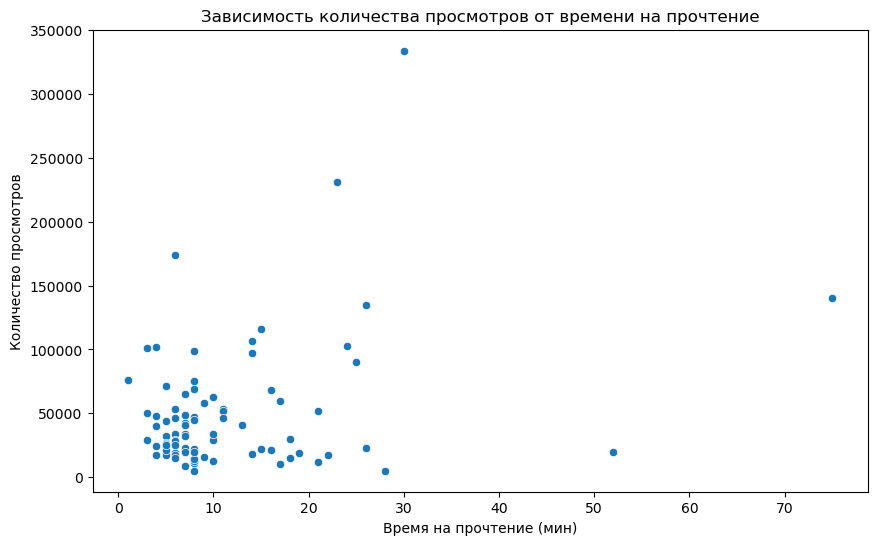

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=articles_df, x='Время на прочтение', y='Количество просмотров')
plt.title('Зависимость количества просмотров от времени на прочтение')
plt.xlabel('Время на прочтение (мин)')
plt.ylabel('Количество просмотров')
plt.show()

## Построение графика heatmap

In [23]:
articles_df['Уровень сложности'] = articles_df['Уровень сложности'].str.replace('Простой', '1').str.replace('Средний', '2').str.replace('Сложный', '3').astype(int)

plt.figure(figsize=(10,5))
c = articles_df[['Время на прочтение','Количество просмотров','Уровень сложности']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)

ValueError: cannot convert float NaN to integer

## Связность тэгов

In [ ]:
articles_df['tags'] = articles_df['tags'].apply(lambda x: x if isinstance(x, list) else [])


In [8]:
G = nx.Graph()

for tags in articles_df['tags']:
    for tag1 in tags:
        for tag2 in tags:
            if tag1 != tag2:
                if G.has_edge(tag1, tag2):
                    G[tag1][tag2]['weight'] += 1
                else:
                    G.add_edge(tag1, tag2, weight=1)

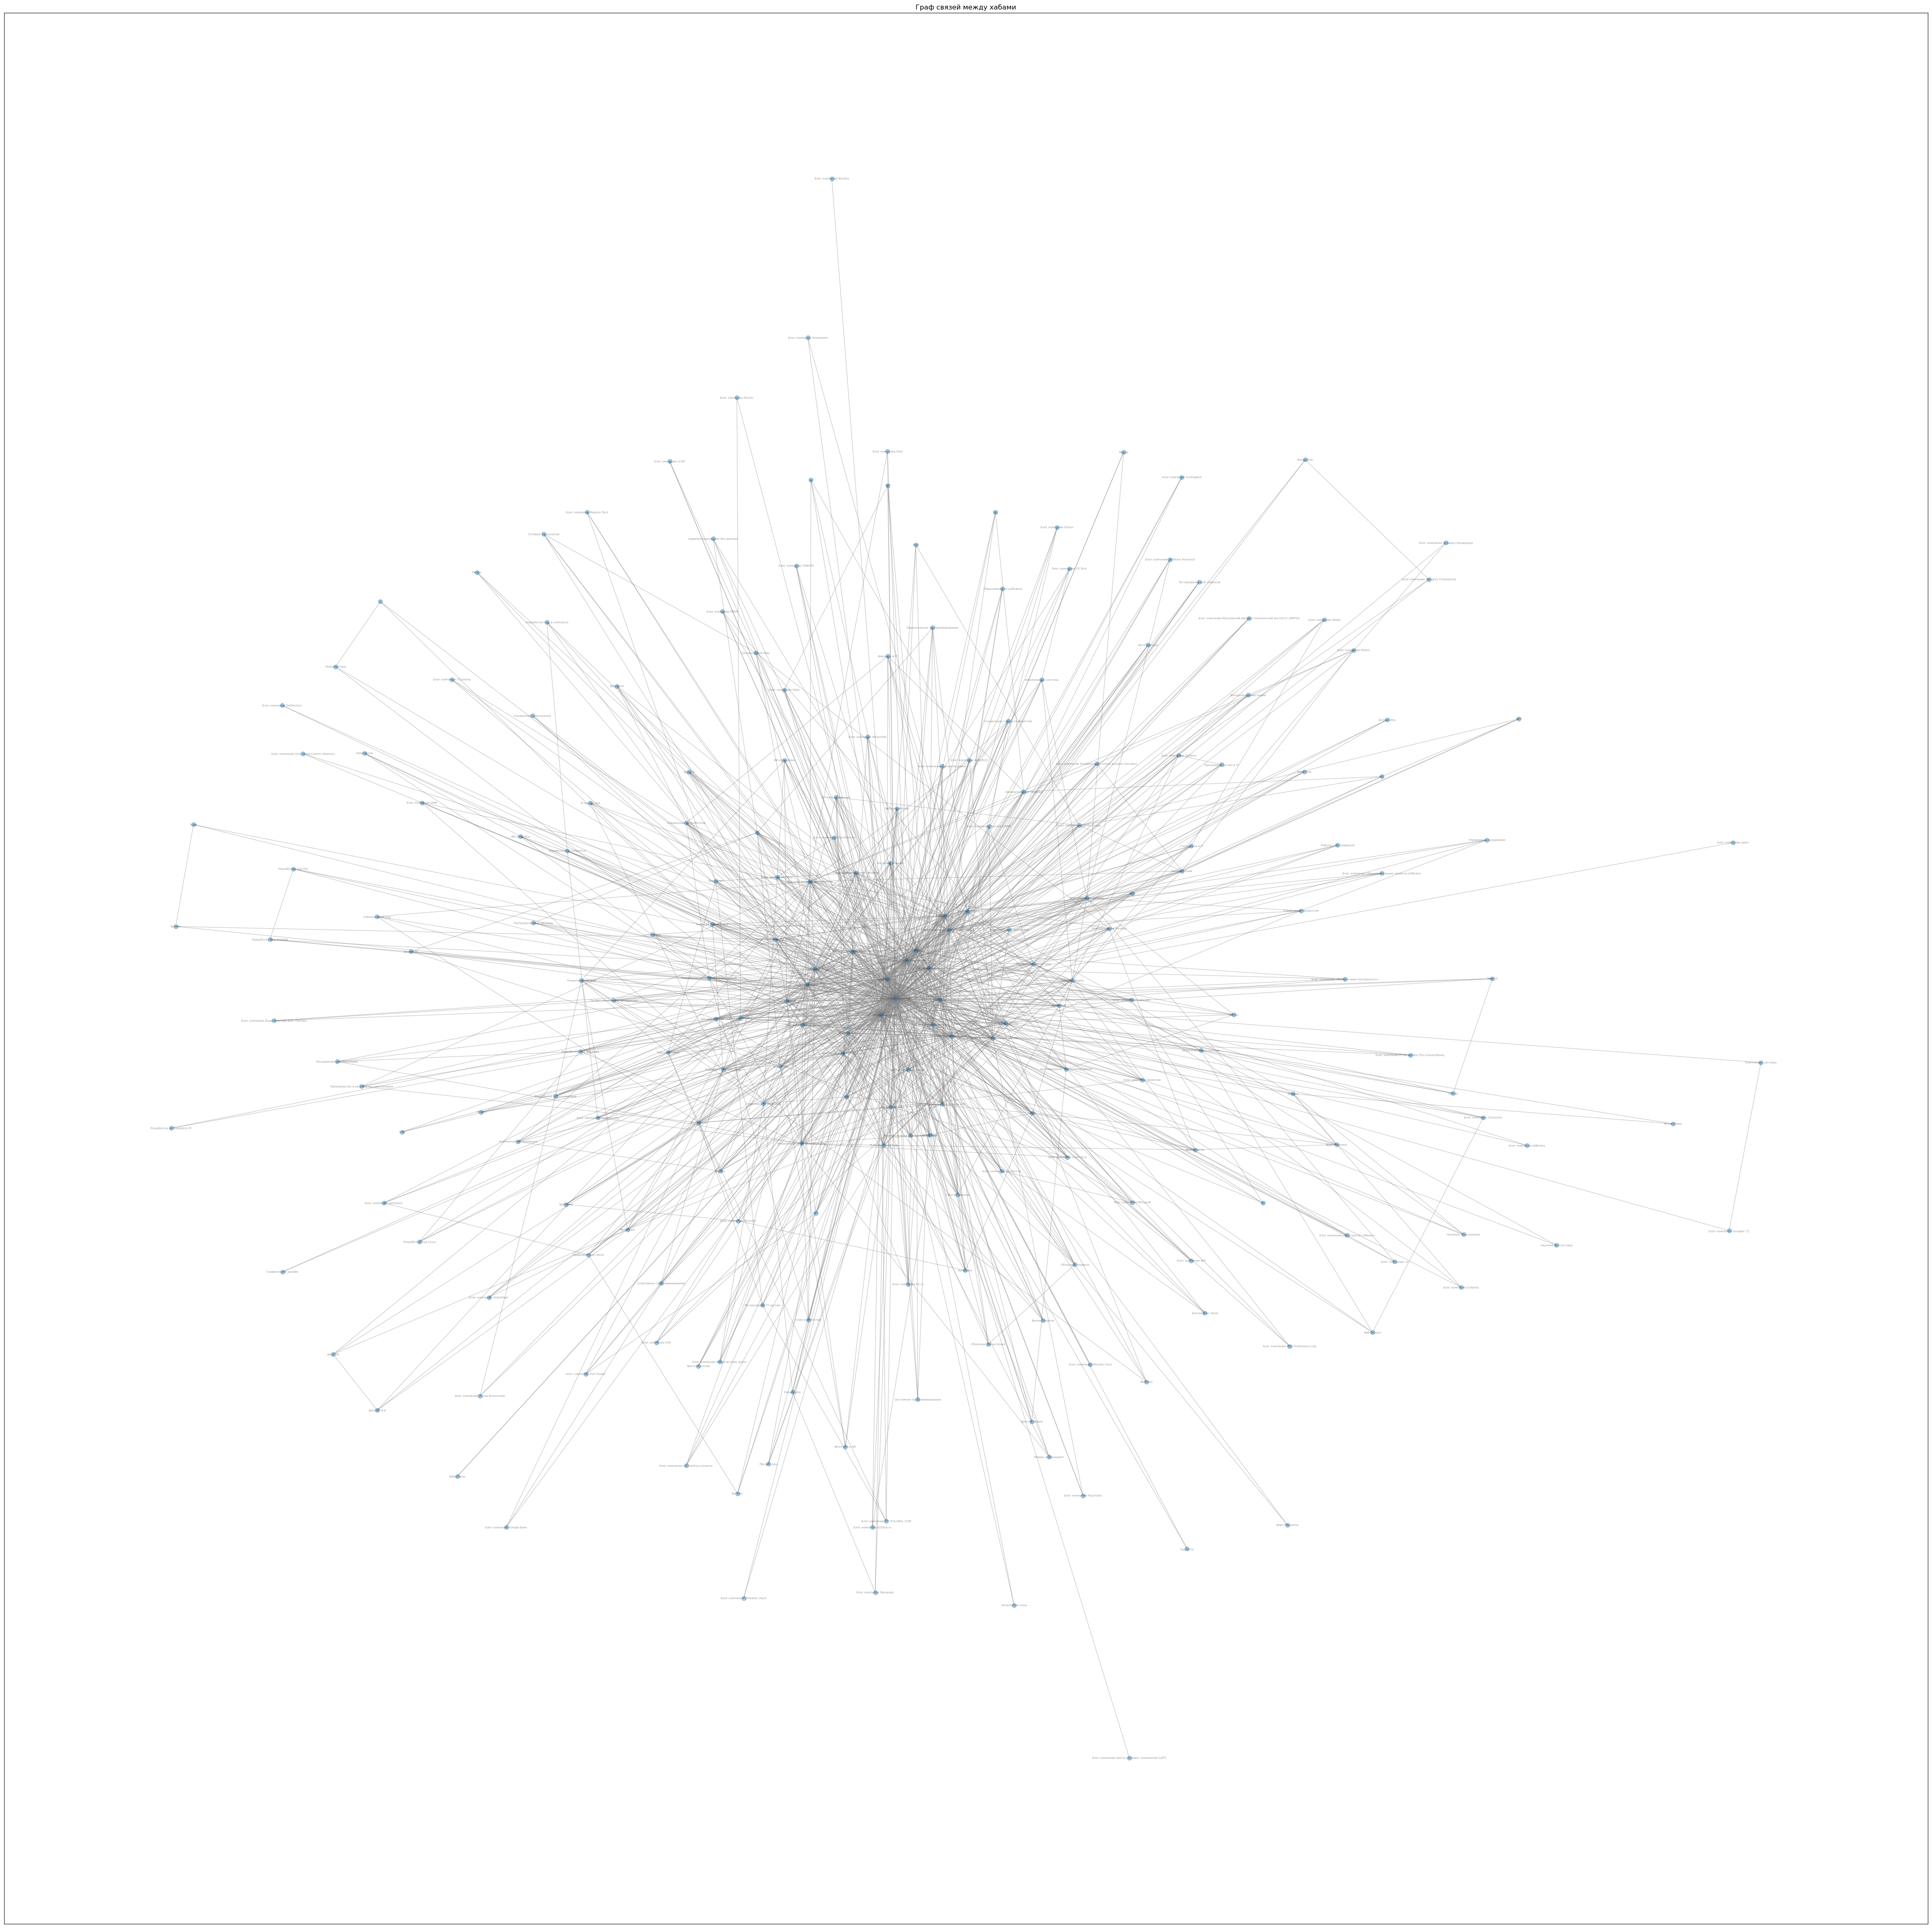

In [9]:
plt.figure(figsize=(60, 60))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw_networkx(G, pos, node_size=50, edge_color='gray', alpha=0.4, with_labels=True, font_size=5)
plt.title('Граф связей между тэгами')
plt.show()

In [10]:
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Топ-10 тэгов по центральности:")
for tag, value in sorted_centrality:
    print(f"{tag}: {value}")

Топ-10 тэгов по центральности:
Машинное обучение: 1.0
Искусственный интеллект: 0.5178571428571428
Обработка изображений: 0.33928571428571425
Алгоритмы: 0.2901785714285714
Python: 0.2589285714285714
Программирование: 0.24107142857142855
Big Data: 0.24107142857142855
Блог компании Яндекс: 0.20982142857142855
Data Mining: 0.20535714285714285
Блог компании Open Data Science: 0.19642857142857142


## Пользователи, которые написали наибольшее количество статей

In [11]:
articles_df['tag'] = '@' + articles_df['creator'].astype(str).apply(lambda x: re.search(r"/ru/users/([^/]+)/", x).group(1) if x and '/ru/users/' in x else None)
# df['users'] = df['users'].apply(lambda x: re.search(r"/ru/users/([^/]+)/", x).group(1))


In [12]:
display(articles_df)

Уровень сложности  Время на прочтение  Количество просмотров  \
0             Простой                   8                  69000   
1             Простой                  30                 334000   
2             Простой                   4                 102000   
3             Простой                   3                 101000   
4                 NaN                  18                  70000   
..                ...                 ...                    ...   
595               NaN                   9                  42000   
596               NaN                  11                  57000   
597               NaN                  11                  10000   
598               NaN                  10                  22000   
599               NaN                  11                  13000   

                                                  tags  \
0    [Работа с видео, Машинное обучение, Искусствен...   
1    [Блог компании Open Data Science, Машинное обу...   
2           [Машинное обучение, Управление персоналом]   
3    [Машинное обучение, Искусственный интеллект, М...   
4    [Программирование, Сжатие данных, Машинное обу...   
..                                                 ...   
595    [Блог компании VK, Big Data, Машинное обучение]   
596  [Блог компании Selectel, IT-инфраструктура, Da...   
597  [Блог компании Ozon Tech, Python, Обработка из...   
598  [Блог компании AvitoTech, Высокая производител...   
599  [Блог компании Город Иннополис, Обработка изоб...   

                       creator              tag  
0           /ru/users/Realife/         @Realife  
1    /ru/users/stalkermustang/  @stalkermustang  
2      /ru/users/Odin_Himself/    @Odin_Himself  
3         /ru/users/aGGre55or/       @aGGre55or  
4           /ru/users/3Dvideo/         @3Dvideo  
..                         ...              ...  
595        /ru/users/volinski/        @volinski  
596            /ru/users/lodz/            @lodz  
597  /ru/users/alex_golubev13/  @alex_golubev13  
598       /ru/users/kopytovsv/       @kopytovsv  
599        /ru/users/Sk0rpion/        @Sk0rpion  

[599 rows x 6 columns]

1. Извлечь тэги пользователей из статей
2. Посчитать количество статей для каждого пользователя
3. Посмотреть, что это за пользователи

In [13]:
articles_per_user = articles_df['tag'].value_counts()


In [14]:
print(articles_per_user) 


tag
@ZlodeiBaal      16
@m1rko           16
@alizar          12
@Leono           11
@BarakAdama      11
                 ..
@tw_community     1
@ua-hosting       1
@comratvlad       1
@Crossover        1
@Sk0rpion         1
Name: count, Length: 362, dtype: int64


In [15]:
users_df = pd.read_json('../data/users.json')
merged_df = pd.merge(articles_per_user, users_df, on='tag', how='left')



In [16]:
merged_df = merged_df.rename(columns = {"count" : "Количество написанных статей"})
display(merged_df)

tag  Количество написанных статей   karma  rating  \
0             @ZlodeiBaal                            16   452.0    59.0   
1                  @m1rko                            16  1293.0     0.0   
2                 @alizar                            12  1057.0   245.0   
3                  @Leono                            11   214.0    -4.0   
4             @BarakAdama                            11   188.0     1.5   
5         @mephistopheies                             8   139.0     0.0   
6            @PatientZero                             7  1724.0   325.2   
7               @snakers4                             6   308.0     0.6   
8                  @yorko                             6   128.0     0.0   
9                @averkij                             6   214.0     0.1   
10               @3Dvideo                             6   592.0     0.0   
11               @art_pro                             6    67.0     0.0   
12               @ternaus                             5   150.0     0.0   
13             @sim0nsays                             5   252.0     0.0   
14             @Syurmakov                             5    56.0     0.0   
15              @Firemoon                             5   291.0    90.0   
16                @arttom                             5   350.0     0.0   
17             @Doctor_IT                             5   112.0    56.3   
18        @man_of_letters                             5   148.0    -5.0   
19      @virtual_explorer                             4   140.0    71.6   
20               @devpony                             4   128.0     0.0   
21                 @Laggg                             4    56.0    -2.0   
22              @fantast8                             4    83.0    -5.0   
23        @stalkermustang                             4   197.0     2.0   
24          @cointegrated                             4   141.0    -2.0   
25               @Nikuson                             4    28.0    -3.0   
26                @ru_vds                             3   474.0   332.8   
27           @belgraviton                             3    45.0     0.0   
28              @vladbalv                             3    90.0     0.0   
29            @dvorkjoker                             3    30.0     0.0   
30             @boygenius                             3    77.0     0.0   
31                @dairok                             3    74.0    -3.0   
32             @ashagraev                             3    65.0     0.0   
33               @randall                             3   124.0    24.0   
34             @ddimitrov                             3    47.0    -3.0   
35                @Zalina                             3    84.0     0.0   
36               @imalion                             3    38.0     0.0   
37            @DesertFlow                             3   124.0     0.0   
38           @crazyhatter                             3    45.0     0.0   
39              @Milfgard                             3  1848.0    -0.5   
40         @rocknrollnerd                             3   207.0     0.0   
41      @Bright_Translate                             3   360.0   232.7   
42          @Alex_Donchuk                             3    48.0     0.0   
43                  @mkot                             3   247.0     0.0   
44             @madrugado                             3    70.0     0.9   
45               @AlexeyR                             2   234.0     0.0   
46              @Safronov                             2    40.0     0.0   
47            @AloneCoder                             2   382.0     0.0   
48             @VolkoIvan                             2    75.0    -5.0   
49           @hommforever                             2    21.0    -4.0   
50                 @fediq                             2    81.0     0.0   
51          @alexanderkuk                             2   195.0     0.0   
52              @miptgirl                      